In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
Ai_Brain = Sequential([
Dense(units = 9, activation = 'relu',input_shape = [8]),
Dense(units = 9, activation = 'relu'),
Dense(units = 9, activation = 'relu'),
Dense(units = 1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
Ai_Brain.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 9)                   │              81 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('data1').sheet1

In [ ]:
rows = worksheet.get_all_values()



In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'input':'int'})
df.head()

,input,output
0,1,86
1,2,72
2,3,45
3,4,92
4,5,96


In [ ]:
dataset1 = pd.DataFrame(rows[1:],columns=rows[0])
dataset1 = dataset1.astype({'input':'int'})
dataset1 = dataset1.astype({'output':'int'})

In [ ]:
X = dataset1[['input']].values
y = dataset1[['output']].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=0)

In [ ]:
Scaler = MinMaxScaler()

In [ ]:
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)

In [ ]:
Ai_Brain = Sequential([
    Dense(8,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])

In [ ]:
Ai_Brain.compile(optimizer = 'rmsprop', loss='mse')

In [ ]:
Ai_Brain.fit(X_train1,y_train,epochs=2000)

Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 5227.5874
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 5223.1187
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 5219.9092
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 5217.3315
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 5215.0835
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 5213.0381
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 5211.1367
Epoch 8/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 5209.3726
Epoch 9/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 5207.6733
Epoch 10/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 5206.0674
Epoch 11/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 5204.5962
Epoch 12/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 5203.1836
Epoch 13/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 5201.8081
Epoch 14/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 5200.4639
Epoch 15/2000
1/1 ━━

<Axes: >

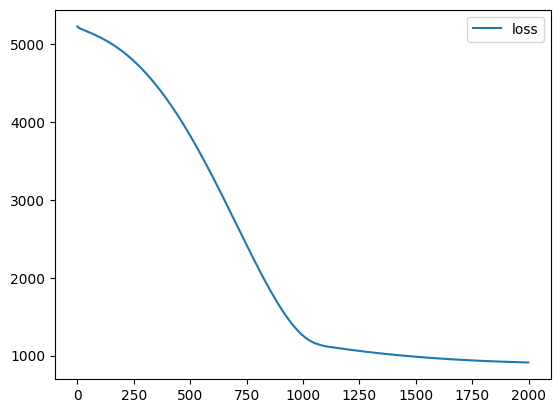

In [ ]:
loss_df=pd.DataFrame(Ai_Brain.history.history)
loss_df.plot()

In [ ]:
X_test1=Scaler.transform(X_test)

In [ ]:
Ai_Brain.evaluate(X_test1,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 625.1396


625.1396484375

In [ ]:
X_n1=[[10]]

In [ ]:
X_n1_1=Scaler.transform(X_n1)

In [ ]:
Ai_Brain.predict(X_n1_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[66.514145]], dtype=float32)

In [ ]:
import os
import base64
import numpy as np
import tensorflow as tf